# Plot intensity quantiles of Zimmer video

## Imports and magics

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

from otimage.utils import plot_maxproj

## Load raw Zimmer data

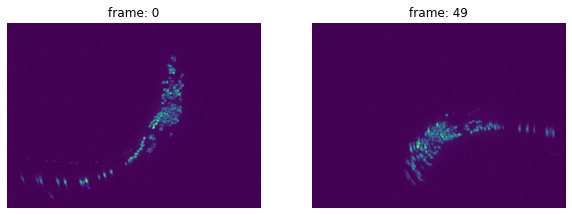

In [3]:
# Frames to load
t_start = 0
n_frames = 50
t_vals = range(t_start, t_start + n_frames)

# Function to load uint16 images
def get_frame(dset, t):
    frame = dset[t, 0, :, :, :]
    return np.moveaxis(frame, [0, 1, 2], [2, 1, 0])
    
# Load uint16 images
img_path = '/home/mn2822/Desktop/WormOT/data/zimmer/raw/mCherry_v00065-00115.hdf5'
with h5py.File(img_path, 'r') as f:
    dset = f.get('mCherry')
    img = [get_frame(dset, t) for t in t_vals]
    img_shape = img[0].shape

# Indices to plot
k1 = 0
k2 = -1
  
plt.figure(figsize=(10, 10))

plt.subplot(121)
plot_maxproj(img[k1])
plt.title(f'frame: {t_vals[k1]}')
plt.axis('off')

plt.subplot(122)
plot_maxproj(img[k2])
plt.title(f'frame: {t_vals[k2]}')
plt.axis('off');

## Plot quantiles for each frame

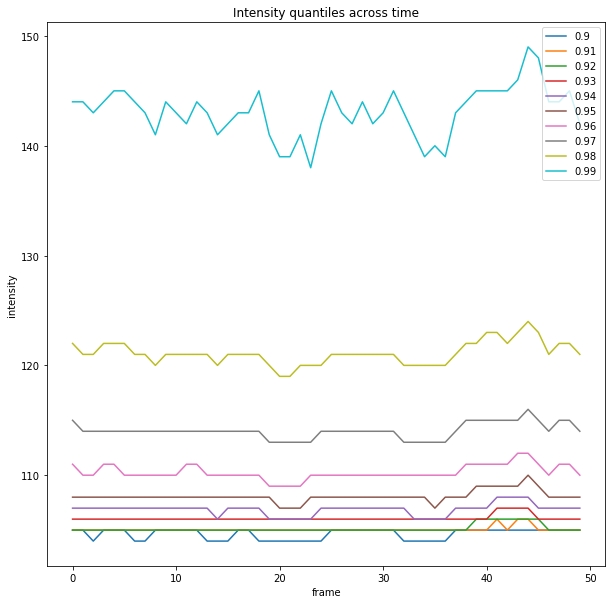

In [6]:
fig = plt.figure(figsize=(10, 10))

q_to_plot = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

for q in q_to_plot:
    
    quant = [np.quantile(x, q) for x in img]
    plt.plot(t_vals, quant, label=f'{q}')
    
plt.title('Intensity quantiles across time')
plt.xlabel('frame')
plt.ylabel('intensity')
plt.legend()

#plt.savefig('zimmer_quantiles.png')

## Plot histogram and cdf of frame

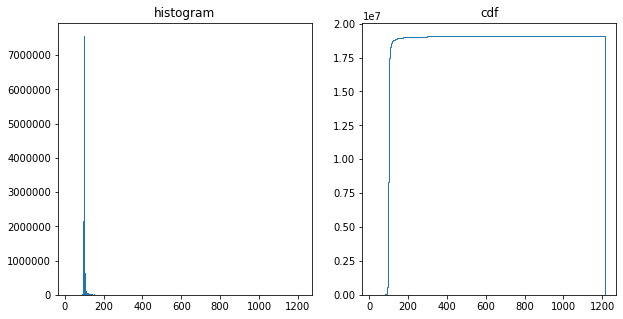

In [7]:
t = 40

fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(10, 5))

ax_1.set_title('histogram')
ax_2.set_title('cdf')

ax_1.hist(img[t].flatten(), 500);
ax_2.hist(img[t].flatten(), 500, histtype='step', cumulative=True);

#plt.savefig(f'hist_frame_{t}.png')